### Instance-Based Learning

Instance-Based Learning is a family of supervised learning methods that simply store the training examples. Instance-based methods are sometimes referred to as "lazy" learning methods because they delay processing until a new instance must be classified. A key advantage of this kind of delayed, or lazy, learning is that instead of estimating the target function once for the entire instance space, these methods can estimate it locally and differently for each new instance to be classified [1].

There are few instance-based learning algoritms, such as:
1. K-nearest Neighbors (KNN)
2. Collaborative filtering
3. Support Vector Machine (SVM)

The dataset that would be use for the assignment is Online Shoppers Purchasing Intention [2] (detail discussion on the dataset and how to pre-processing the data are discussed on "Material" section). The dataset is pre-processed to just include features that are considered have impacts on the outcomes. The dataset's features are either numerical/continuous (4 features) or categorical (5 features) with total data of 12,330 records so the dimentionality is considered low.  The dataset only has 2 classes (not multi-class). The instance-based learning algorithms that would be explored for the dataset is KNN and SVM. 

KNN is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. KNN calculates the approximate distances between the vectors and then assign the points which are not yet labeled to the class of its k-nearest neighbors. In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. KNN performs better with a lower number of features than a large number of features [3]. 

KNN has the following basic steps:
1. Calculate distance
2. Find closest neighbors
3. Vote for labels

SVM offers very high accuracy compared to other classifiers such as logistic regression and decision trees. SVM works with the classifier separates data points using a hyperplane with the largest amount of margin. SVM finds an optimal hyperplane which helps in classifying new data points. The idea behind SVMs is to maximize the margin that better classifies the data. The hyperparameter 𝐶 set when training an SVM classifier is a tradeoff between encouraging larger margins by violating them or being stricter with the violations by making the margins smaller [4]. SVM searches for the maximum marginal hyperplane in the following steps [3]:
1. Generate hyperplanes which segregates the classes in the best way. 
2. Select the right hyperplane with the maximum segregation from the either nearest data points.

#### K-nearest Neighbours
The performance of the K-NN algorithm is influenced by three main factors:
1. The distance function or distance metric used to determine the nearest neighbors.
2. The decision rule used to derive a classification from the K-nearest neighbors.
3. The number of neighbors used to classify the new example.

To implement the classifier, the KNN algorithm from the scikit learn module was used (sklearn.neighborsKNeighborsClassifier). The parameter we need to tuning is weights, n_neighbors, and metric. We use GridSearchCV to select the best parameters from the listed hyperparameters. GridSearchCV is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyperparameters and fit the estimator (model) on your training set. The grid search picks out a grid of hyperparameter values, evaluates every one of them, and returns the winner. We can also determine the number of times for cross-validation for each set of hyperparameters. 

We split the dataset into a set for training (75%) and testing (25%) (stratified to ensure they both have the same class ratio). Then, a cross-validated grid-search method (GridSearchCV) over a manually set parameter grid was conducted to tune the hyperparameters and evaluate the models. The cross validation split the data into $k$ (typically 5 or 10 is generally optimal, but due to the smaller size of the dataset, 5 was selected to maintain representativeness of the samples) folds, where the data was fitted using $k-1$ folds and validated with the remaining fold for each parameter set. Therefore, we do not split the dataset into testing, validation and test. The GridSearchCV using cv=5 would do the work. 

The hyperparameter setting returning the highest average f1 score was then selected as the model for use on the test set. The performance metric used is 'f1', which is a weighted average of the precision and recall of the model [5]. The reason for choosing f1 score over the more commonly used 'Accuracy' is because of the class imbalance (high number of majority class 'False' examples), as the f1 score does not make use of the 'True Negatives' as with the case of 'Accuracy', but rather focuses on the ability of the model to predict the minority class correctly.

In [3]:
# import necessary modules for this notebook
from IBL_Online_Shoppers import *

In [14]:
def src_classifier_knn(x_train, y_train):
    param_grid = [{'weights': ["uniform", "distance"],
                   'n_neighbors': [1, 3, 5],
                   'metric': ['euclidean', 'manhattan', 'cosine', 'minkowski', 'hamming']}]
    
    classifier = KNeighborsClassifier()
    grid_search = GridSearchCV(classifier, param_grid, cv=5, verbose=0, scoring='f1')
    grid_search.fit(x_train, y_train)
    
    classifier = grid_search.best_estimator_
    print(classifier)
    print(grid_search.best_params_)

    classifier.fit(x_train, y_train)
    return classifier

KNeighborsClassifier(metric='cosine', n_neighbors=1)
{'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'}


Accuracy Report for Training
Train score 0.9998918568184276
F1 Score: 1.00
Train Confusion matrix


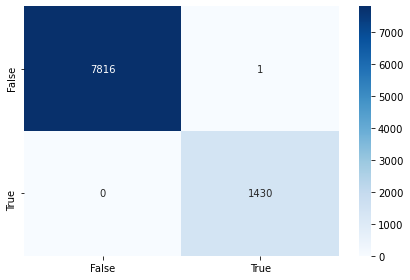

              False      True
precision  0.999872  1.000000
recall     1.000000  0.999301


In [15]:
data_frame_os = read_data_return_frame("online_shoppers_intention.csv")
x, y, class_names, feature_names = preprocess_df(data_frame_os)
x_train, x_test, y_train, y_test = train_test(x, y, test_size=0.25)
classifier = src_classifier_knn(x_train, y_train)

print("\n")
print("Accuracy Report for Training")
y_pred_train = prediction(classifier, x_train)
accuracy_cm_report(y_train, y_pred_train, class_names=class_names)

Accuracy Report for Testing
Train score 0.7619202075900098
F1 Score: 0.24
Train Confusion matrix


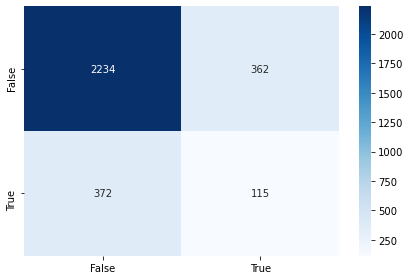

              False     True
precision  0.860555  0.23614
recall     0.857252  0.24109


In [16]:
print("Accuracy Report for Testing")
y_pred_test = prediction(classifier, x_test)
accuracy_cm_report(y_test, y_pred_test, class_names=class_names)

We can se that the GridSearchCV result for the best parameters are {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'} based on highest average f1 score for the training dataset. We can see the f1 score for training dataset is 1.00 which is considered very high. However, using the same parameters, the f1 score for test dataset is 0.24 which is considered low. This is might be caused by the selected n_neighbours which is 1 make the classification overfit. There are some numbers that are tried as n_neighbour but after being compared with n_neighbour=1, the best parameter for n_neighbour is always one. It might also be caused by the dataset itself that is highly unbalanced, where the 'False' class outnumbers the 'True' class by a ratio of about 5:1. There is also possibility that the model does not perform very well because the dataset is not normalized. We will look how does SVM perform on the dataset.  

#### Support Vector Machine
Same as KNN or other machine learning algorithms, SVM also need to tune the parameters’ values to effectively improves model performance. There are some important parameters that having higher impact on model perofromance which are:
1. kernel, specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. 
2. gamma, kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
3. C, is regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. 

To implement the classifier, the SVM algorithm from the scikit learn module was used (sklearn.svm.SVC). As discussed earlier, the parameter we need to tuning are kernel, gamma, and C. We use GridSearchCV to select the best parameters from the listed hyperparameters. We use GridSearchCV to select the best parameters from the listed hyperparameters that has been discussed earlier.

We tried to search the classifier with the same dataset and scoring f1 as discussed earlier. However, using the dataset, GridSearchCV takes so much time and do not show result. Therefore, we perform another preprocessing of the dataset.

The first pre-processed dataset "data_frame_os" represents the dataset in which the categorical variables have been factorized whilst the numerical variables are left untouched. We performed another pre-process of the dataset "data_frame_os" to become "data_frame_os_cat" that represents the transformed dataset in which all variables have been set to categorical. Both of the datasets shown below.

In [12]:
data_frame_os

,ProductRelated_Duration,ProductRelatedAve,BounceRates,ExitRates,SpecialDay,Month,Region,VisitorType,Weekend,Revenue
0,0.000000,0.000000,0.200000,0.200000,0.0,0,0,0,0,False
1,64.000000,32.000000,0.000000,0.100000,0.0,0,0,0,0,False
2,0.000000,0.000000,0.200000,0.200000,0.0,0,1,0,0,False
3,2.666667,1.333333,0.050000,0.140000,0.0,0,2,0,0,False
4,627.500000,62.750000,0.020000,0.050000,0.0,0,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...
12325,1783.791667,33.656447,0.007143,0.029031,0.0,9,0,0,1,False
12326,465.750000,93.150000,0.000000,0.021333,0.0,7,0,0,1,False
12327,184.250000,30.708333,0.083333,0.086667,0.0,7,0,0,1,False
12328,346.000000,23.066667,0.000000,0.021053,0.0,7,3,0,0,False


In [17]:
data_frame_os_cat = data_frame_os.copy()
convert_num_to_cat(data_frame_os_cat) # function bins the continuous variables and label encodes it
data_frame_os_cat

,ProductRelated_Duration,ProductRelatedAve,BounceRates,ExitRates,SpecialDay,Month,Region,VisitorType,Weekend,Revenue
0,0,0,2,4,0,0,0,0,0,False
1,0,2,0,4,0,0,0,0,0,False
2,0,0,2,4,0,0,1,0,0,False
3,0,0,2,4,0,0,2,0,0,False
4,2,4,1,3,0,0,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...
12325,4,2,0,2,0,9,0,0,1,False
12326,2,4,0,2,0,7,0,0,1,False
12327,1,2,2,4,0,7,0,0,1,False
12328,1,1,0,2,0,7,3,0,0,False


We performed GridSearchCV for SVM with new dataset "data_frame_os_cat". The result is shown below.

In [19]:
def src_classifier_svm(x_train, y_train):
    parameters = {'kernel': ('linear', 'rbf', 'sigmoid'), 'gamma': ('scale', 'auto'), 'C': (7,8,13)}
    svc = SVC()
    grid_search = GridSearchCV(svc, parameters, cv=5, verbose=0, scoring='f1')
    grid_search.fit(x_train, y_train)

    classifier = grid_search.best_estimator_
    print(classifier)
    print(grid_search.best_params_)

    classifier.fit(x_train, y_train)
    return classifier

SVC(C=8, kernel='sigmoid')
{'C': 8, 'gamma': 'scale', 'kernel': 'sigmoid'}
Accuracy Report for Training
Train score 0.7572185573699578
F1 Score: 0.21
Train Confusion matrix


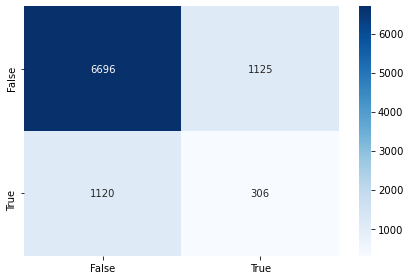

              False      True
precision  0.856157  0.214586
recall     0.856704  0.213836


In [37]:
x_cat, y_cat = preprocess_df_cat(data_frame_os_cat)
x_train, x_test, y_train, y_test = train_test(x_cat, y_cat, test_size=0.25)
x_train, y_train = reshape(x_train, y_train)
classifier = src_classifier_svm(x_train, y_train)

print("Accuracy Report for Training")
y_pred_train = prediction(classifier, x_train)
accuracy_cm_report(y_train, y_pred_train, class_names=class_names)

Accuracy Report for Testing
Train score 0.7421342847875446
F1 Score: 0.19
Train Confusion matrix


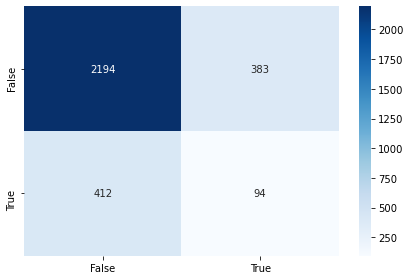

              False      True
precision  0.851378  0.185771
recall     0.841903  0.197065


In [24]:
x_test, y_test = reshape(x_test, y_test)

print("Accuracy Report for Testing")
y_pred_test = prediction(classifier, x_test)
accuracy_cm_report(y_test, y_pred_test, class_names=class_names)

We can se that the GridSearchCV result for the best parameters are {'C': 8, 'gamma': 'scale', 'kernel': 'sigmoid'} based on highest average f1 score for the training dataset. We can see the f1 scores for training and test dataset are both less than or equal to 0.21 which is considered low. It might be caused by the dataset itself that is highly unbalanced, where the 'False' class outnumbers the 'True' class by a ratio of about 5:1. There is also possibility that the model does not perform very well because the dataset is not normalized.

In this report, we tried to cover the imbalanced data issue by performing resampling technique. Resampling techniques may be helpful in helping to address the issue of class imbalance [6]. There are three methods that are tested in this report which are oversampling, downsampling and synthetic minority oversampling. 

Oversampling adds more copies of the minority class in the training set to make it even with the majority class, while conversely downsampling removes observations of the majority class. We cannot use the whole dataset when performing resample. We need to divide the dataset into training set and test set before performing resample. The resampling module from Scikit-Learn has been used to achieve this. Meanwhile, synthetic minority oversampling oversampling technique (SMOTE) creates synthetic samples using a nearest neighbors algorithm to generate new and synthetic data. This is done using the SMOTE function from the imblearn module.

#### Upsampling

In [23]:
def upsample_minority(x, y):
    # concatenate our training data back together
    X = pd.concat([x, y], axis=1)

    # separate minority and majority classes
    not_true = X[X.Revenue == 0]
    true = X[X.Revenue == 1]

    # upsample minority
    true_upsampled = resample(true,
                              replace=True,  # sample with replacement
                              n_samples=len(not_true),  # match number in majority class
                              random_state=43)  # reproducible results

    # combine majority and upsampled minority
    upsampled = pd.concat([not_true, true_upsampled])

    # check new class counts
    upsampled.Revenue.value_counts()

    y = upsampled.Revenue
    x = upsampled.drop('Revenue', axis=1)

    return x, y

KNeighborsClassifier(metric='hamming', n_neighbors=3, weights='distance')
{'metric': 'hamming', 'n_neighbors': 3, 'weights': 'distance'}


Accuracy Report for Training with KNN
Train score 0.9318065506653019
F1 Score: 0.93
Train Confusion matrix


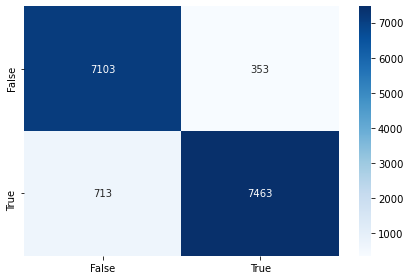

              False      True
precision  0.952656  0.912794
recall     0.908777  0.954836


In [53]:
x_train, x_test, y_train, y_test = train_test(x_cat, y_cat, test_size=0.25)

x_train, y_train = upsample_minority(x_train, y_train)
classifier = src_classifier_knn(x_train, y_train)

print("\n")
print("Accuracy Report for Training with KNN")
y_pred_train = prediction(classifier, x_train)
accuracy_cm_report(y_train, y_pred_train, class_names=class_names)


Accuracy Report for Testing KNN
Train score 0.70969834576711
F1 Score: 0.31
Train Confusion matrix


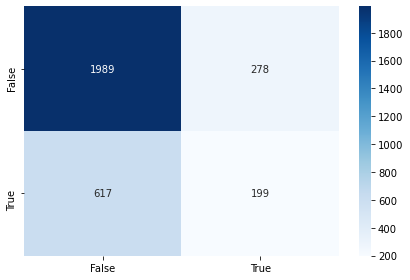

              False      True
precision  0.877371  0.243873
recall     0.763239  0.417191


In [54]:
print("Accuracy Report for Testing KNN")
y_pred_test = prediction(classifier, x_test)
accuracy_cm_report(y_test, y_pred_test, class_names=class_names)


SVC(C=19)
{'C': 19, 'kernel': 'rbf'}


Accuracy Report for Training with SVM
Train score 0.7250511770726714
F1 Score: 0.75
Train Confusion matrix


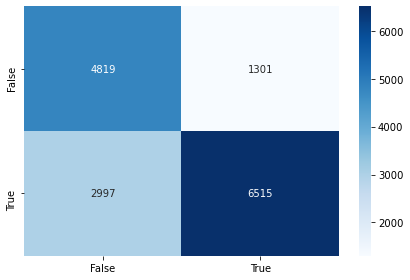

              False      True
precision  0.787418  0.684924
recall     0.616556  0.833547


In [46]:
def src_classifier_svm_up(x_train, y_train):
    parameters = {'kernel': ('linear', 'rbf'), 'C': (15,17,19)}
    svc = SVC()
    grid_search = GridSearchCV(svc, parameters, cv=5, verbose=0)
    grid_search.fit(x_train, y_train)

    classifier = grid_search.best_estimator_
    print(classifier)
    print(grid_search.best_params_)

    classifier.fit(x_train, y_train)
    return classifier

x_train, x_test, y_train, y_test = train_test(x_cat, y_cat, test_size=0.25)

x_train, y_train = upsample_minority(x_train, y_train)
classifier = src_classifier_svm_up(x_train, y_train)

print("\n")
print("Accuracy Report for Training with SVM")
y_pred_train = prediction(classifier, x_train)
accuracy_cm_report(y_train, y_pred_train, class_names=class_names)

Accuracy Report for Testing SVM
Train score 0.6143366850470321
F1 Score: 0.37
Train Confusion matrix


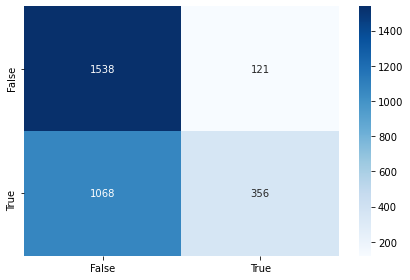

              False      True
precision  0.927064  0.250000
recall     0.590177  0.746331


In [47]:
print("Accuracy Report for Testing SVM")
y_pred_test = prediction(classifier, x_test)
accuracy_cm_report(y_test, y_pred_test, class_names=class_names)

We can se that the GridSearchCV result changes for the upsampled dataset both for KNN and SVM. We can also see the increase of f1 scores for testing with KNN and SVM. Overall, after upsampling, SVM performs better thatn KNN for test data. There are many numbers has been tried as C parameter of the SVM and the "f1" score increase as "C" increase. However, the searching time is also increase and we selected "C" with acceptable processing time.

#### Downsampling

In [48]:
def downsample_majority(x, y):
    # concatenate our training data back together
    X = pd.concat([x, y], axis=1)

    # separate minority and majority classes
    not_true = X[X.Revenue == 0]
    true = X[X.Revenue == 1]

    # downsample minority
    not_true_downsampled = resample(not_true,
                                    replace=False,  # sample without replacement
                                    n_samples=len(true),  # match minority n
                                    random_state=42)  # reproducible results

    # combine majority and upsampled minority
    downsampled = pd.concat([not_true_downsampled, true])

    # check new class counts
    downsampled.Revenue.value_counts()

    y = downsampled.Revenue
    x = downsampled.drop('Revenue', axis=1)

    return x, y

KNeighborsClassifier(metric='euclidean')
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


Accuracy Report for Training with KNN
Train score 0.7624039133473096
F1 Score: 0.77
Train Confusion matrix


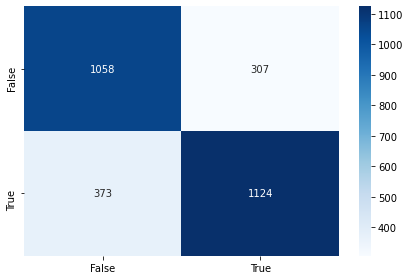

              False      True
precision  0.775092  0.750835
recall     0.739343  0.785465


In [49]:
x_train, x_test, y_train, y_test = train_test(x_cat, y_cat, test_size=0.25)

x_train, y_train = downsample_majority(x_train, y_train)
classifier = src_classifier_knn(x_train, y_train)

print("\n")
print("Accuracy Report for Training with KNN")
y_pred_train = prediction(classifier, x_train)
accuracy_cm_report(y_train, y_pred_train, class_names=class_names)

Accuracy Report for Testing KNN
Train score 0.618877716509893
F1 Score: 0.34
Train Confusion matrix


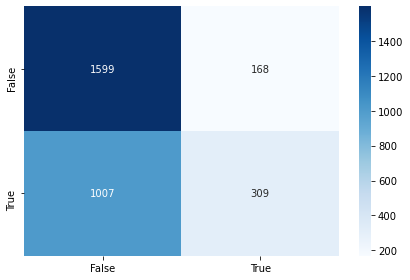

              False      True
precision  0.904924  0.234802
recall     0.613584  0.647799


In [50]:
print("Accuracy Report for Testing KNN")
y_pred_test = prediction(classifier, x_test)
accuracy_cm_report(y_test, y_pred_test, class_names=class_names)

SVC(C=19)
{'C': 19, 'kernel': 'rbf'}


Accuracy Report for Training with SVM
Train score 0.7204751921733054
F1 Score: 0.75
Train Confusion matrix


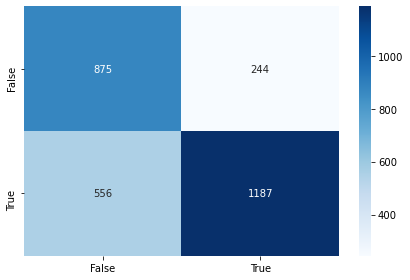

              False     True
precision  0.781948  0.68101
recall     0.611461  0.82949


In [51]:
def src_classifier_svm_down(x_train, y_train):
    parameters = {'kernel': ('linear', 'rbf'), 'C': (15,17,19)}
    svc = SVC()
    grid_search = GridSearchCV(svc, parameters, cv=5, verbose=0)
    grid_search.fit(x_train, y_train)

    classifier = grid_search.best_estimator_
    print(classifier)
    print(grid_search.best_params_)

    classifier.fit(x_train, y_train)
    return classifier

x_train, x_test, y_train, y_test = train_test(x_cat, y_cat, test_size=0.25)

x_train, y_train = downsample_majority(x_train, y_train)
classifier = src_classifier_svm_up(x_train, y_train)

print("\n")
print("Accuracy Report for Training with SVM")
y_pred_train = prediction(classifier, x_train)
accuracy_cm_report(y_train, y_pred_train, class_names=class_names)

Accuracy Report for Testing KNN
Train score 0.5806033084657801
F1 Score: 0.37
Train Confusion matrix


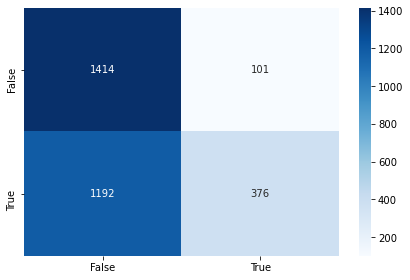

              False      True
precision  0.933333  0.239796
recall     0.542594  0.788260


In [52]:
print("Accuracy Report for Testing KNN")
y_pred_test = prediction(classifier, x_test)
accuracy_cm_report(y_test, y_pred_test, class_names=class_names)

We can se that the GridSearchCV result changes for the downsampled dataset both for KNN and SVM. We can also see the f1 scores for testing with KNN and SVM with downsample is around the same with upsample.